In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
keras.__version__

'2.4.0'

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


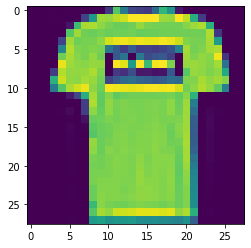

In [ ]:
plt.imshow(X_train_full[1])

In [ ]:
y_train_full[1]

0

In [ ]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train_full[1]]

'T-shirt/top'

In [ ]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

# data normalization

In [ ]:
X_train_n = X_train_full/255.
X_test_n = X_test/255.

# **split data**
# **1 Training data**
# **2 Validatiion data**
# 3 Test data


In [ ]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [ ]:
X_valid[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


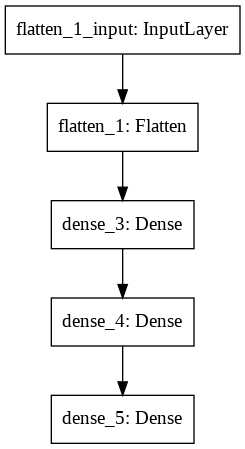

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
weights, biases = model.layers[1].get_weights()

In [ ]:
weights

array([[ 0.03574536, -0.02389931,  0.01030421, ..., -0.06151724,
        -0.0451347 ,  0.03140047],
       [-0.05467119,  0.04656268, -0.07248728, ..., -0.07038655,
        -0.03083268, -0.06513114],
       [-0.03234808, -0.00317231,  0.04102226, ..., -0.03237895,
         0.01965773, -0.00825518],
       ...,
       [-0.0630435 ,  0.07371157, -0.05752673, ...,  0.07049479,
         0.05577183, -0.02518321],
       [-0.02547856,  0.07304457,  0.04983643, ..., -0.05780029,
         0.07438232, -0.0286764 ],
       [-0.02862201,  0.01245171, -0.04573321, ...,  0.04891213,
        -0.06256616, -0.02975626]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])

In [ ]:
model_history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9651 - accuracy: 0.6968 - val_loss: 0.5177 - val_accuracy: 0.8196
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5043 - accuracy: 0.8236 - val_loss: 0.4354 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4511 - accuracy: 0.8406 - val_loss: 0.5381 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4235 - accuracy: 0.8523 - val_loss: 0.3960 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4100 - accuracy: 0.8579 - val_loss: 0.3790 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3804 - accuracy: 0.8656 - val_loss: 0.3723 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3681 - accuracy: 0.8718 - val_loss: 0.3635 - val_accuracy:

In [ ]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
model_history.history

{'accuracy': [0.7692363858222961,
  0.8298909068107605,
  0.8438727259635925,
  0.8550909161567688,
  0.8612181544303894,
  0.866636335849762,
  0.8715454339981079,
  0.8743818402290344,
  0.8794181942939758,
  0.880618155002594,
  0.8839636445045471,
  0.8862727284431458,
  0.8887818455696106,
  0.890927255153656,
  0.8933091163635254,
  0.8953454494476318,
  0.8971090912818909,
  0.8989272713661194,
  0.9012181758880615,
  0.9029818177223206,
  0.9044727087020874,
  0.9068363904953003,
  0.9080727100372314,
  0.9088181853294373,
  0.9103454351425171,
  0.91270911693573,
  0.9146909117698669,
  0.9150727391242981,
  0.9170181751251221,
  0.9178181886672974],
 'loss': [0.7013289928436279,
  0.4859314560890198,
  0.4428972601890564,
  0.4165402352809906,
  0.39806482195854187,
  0.37929385900497437,
  0.36679843068122864,
  0.3555310070514679,
  0.34490543603897095,
  0.3359358608722687,
  0.3273024559020996,
  0.3179299235343933,
  0.3107788562774658,
  0.304914653301239,
  0.297086417

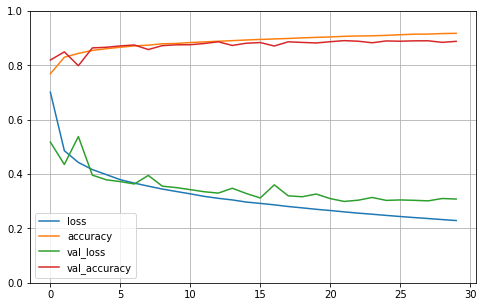

In [ ]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.8787


[0.33938097953796387, 0.8787000179290771]

In [ ]:
X_new = X_test[:1]

In [ ]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


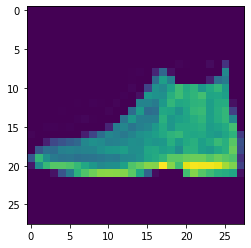

In [ ]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


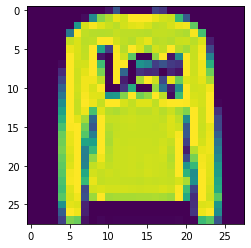

In [ ]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


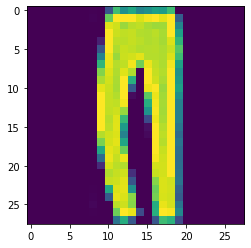

In [ ]:
print(plt.imshow(X_test[2]))